# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)


# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

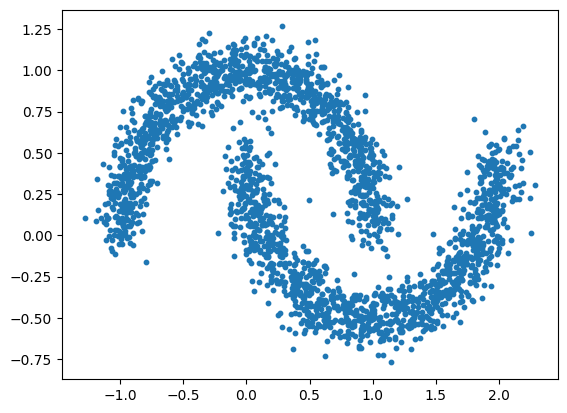

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 3,
    'p_lim': 0.33,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 233 | Loss: 0.9994 | p-value: 3.48E-01:  46%|████▋     | 232/500 [12:43<14:41,  3.29s/it]


Early stopping at epoch 233
Henze-Zirkler p-value:	0.34757834558872336


0.34757834558872336

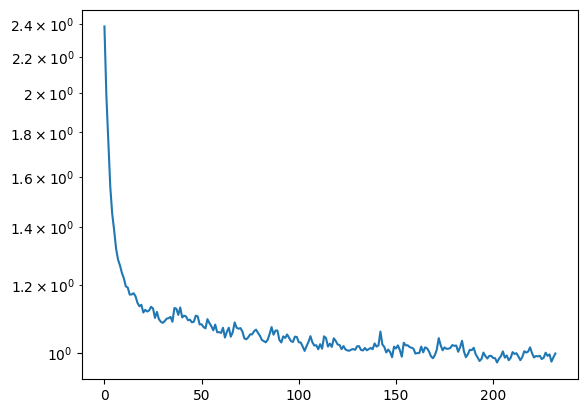

In [13]:
plt.plot(LAM.loss_history)
plt.yscale('log')

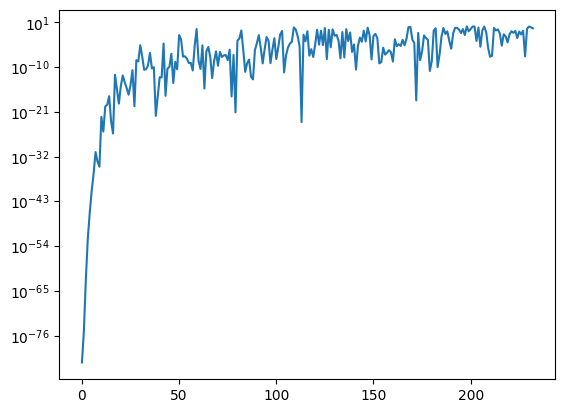

In [14]:
plt.plot(LAM.p_value_history)
plt.yscale('log')

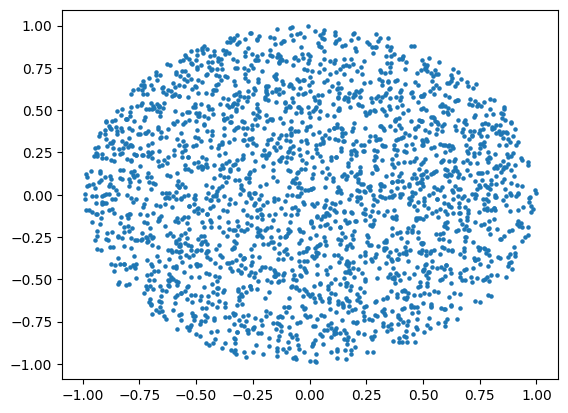

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1089, 1645,  252,  125,  539, 1077,  804, 1899, 1610,  810,
         1637, 1256, 2195,  552, 2045, 1063, 1214, 1653,  203,  112, 1839,
          692, 2031, 2443], dtype=int64)],
 [array([0.        , 0.00024751, 0.00039831, 0.0005197 , 0.00054246,
         0.0008751 , 0.00090849, 0.00101235, 0.00101985, 0.00103595,
         0.00112223, 0.0011278 , 0.00116686, 0.00119281, 0.00120112,
         0.00125354, 0.00129527, 0.00131715, 0.00139567, 0.00142782,
         0.00143628, 0.00144061, 0.00144312, 0.00145597, 0.00155288])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1089, 1645,  252,  125], dtype=int64),
  array([   2,  610, 1635, 1418,  112], dtype=int64),
  array([  5, 901, 923, 239, 131], dtype=int64)],
 [array([0.        , 0.00024751, 0.00039831, 0.0005197 , 0.00054246]),
  array([0.        , 0.00015808, 0.0003466 , 0.00038474, 0.0005023 ]),
  array([0.        , 0.00190441, 0.00279734, 0.00282166, 0.00308834])])

In [9]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.010201935248915106


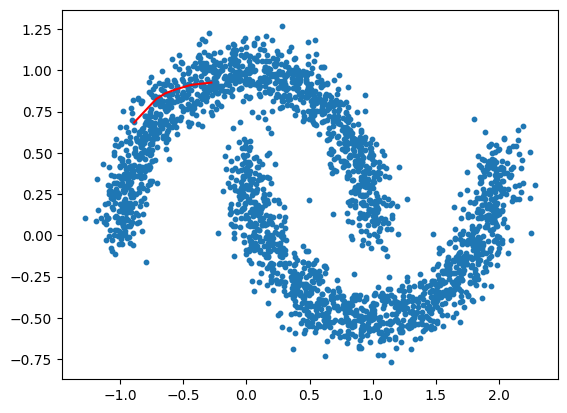

In [10]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

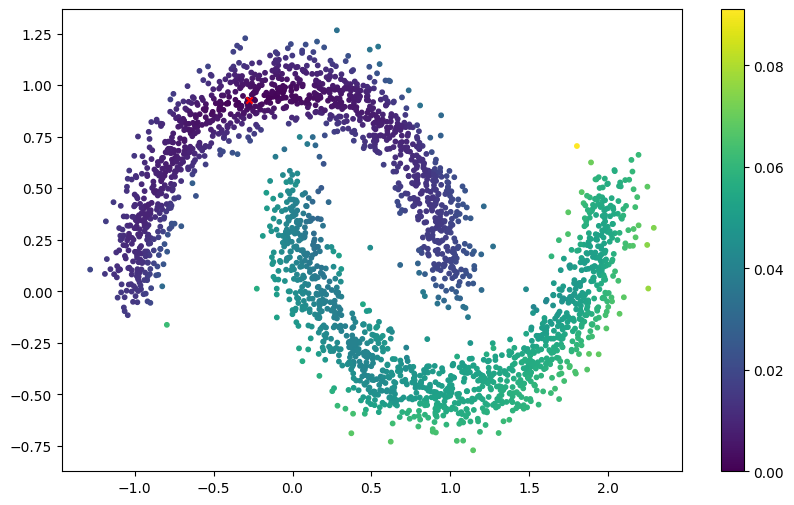

In [11]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()


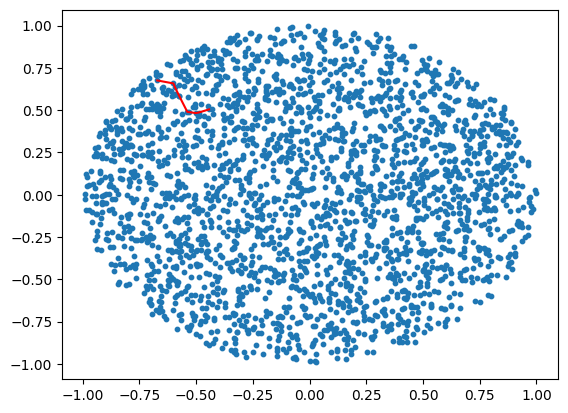

In [12]:
# plot the shortest path in the pushed space
path_pushed = LAM.data_pushed[path]

plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=10)
plt.plot(path_pushed[:, 0], path_pushed[:, 1], 'r')

plt.show()